<u><b><h1>IMAGE CLASSIFIER MODEL</h1></b></u>
<p>This model is built to distinguish sad and happy face.</p>

In [40]:
import os
import tensorflow as tf


In [41]:
# Avoid OOM errors by setting gpu memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
import cv2
import imghdr

In [43]:
data_dir = 'data'
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [44]:
# removing all the unwanted image files
for image_class in os.listdir(data_dir):
    if image_class == 'happy' or image_class == 'sad':
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in img_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)

In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
# processinf the image data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 167 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()

In [91]:
batch = data_iterator.next()

In [92]:
batch[0]

array([[[[ 97.       , 106.       , 111.       ],
         [ 98.90723  , 107.90723  , 112.90723  ],
         [100.850586 , 109.225586 , 114.975586 ],
         ...,
         [ 78.225586 ,  79.225586 ,  74.225586 ],
         [ 77.74219  ,  78.74219  ,  73.74219  ],
         [ 76.74219  ,  77.74219  ,  72.74219  ]],

        [[ 98.       , 107.       , 112.       ],
         [ 99.97168  , 108.97168  , 113.97168  ],
         [102.17676  , 110.55176  , 116.30176  ],
         ...,
         [ 79.19824  ,  80.19824  ,  75.19824  ],
         [ 76.77344  ,  77.77344  ,  72.77344  ],
         [ 75.77344  ,  76.77344  ,  71.77344  ]],

        [[ 98.7334   , 107.7334   , 112.7334   ],
         [ 99.125    , 108.125    , 113.125    ],
         [102.5      , 110.875    , 116.625    ],
         ...,
         [ 79.875    ,  80.875    ,  75.875    ],
         [ 78.       ,  79.       ,  74.       ],
         [ 77.       ,  78.       ,  73.       ]],

        ...,

        [[ 68.328125 ,  89.328125 , 13

In [93]:
batch[1]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int32)

In [94]:
batch[0].shape

(32, 256, 256, 3)

In [95]:
batch[1].shape

(32,)

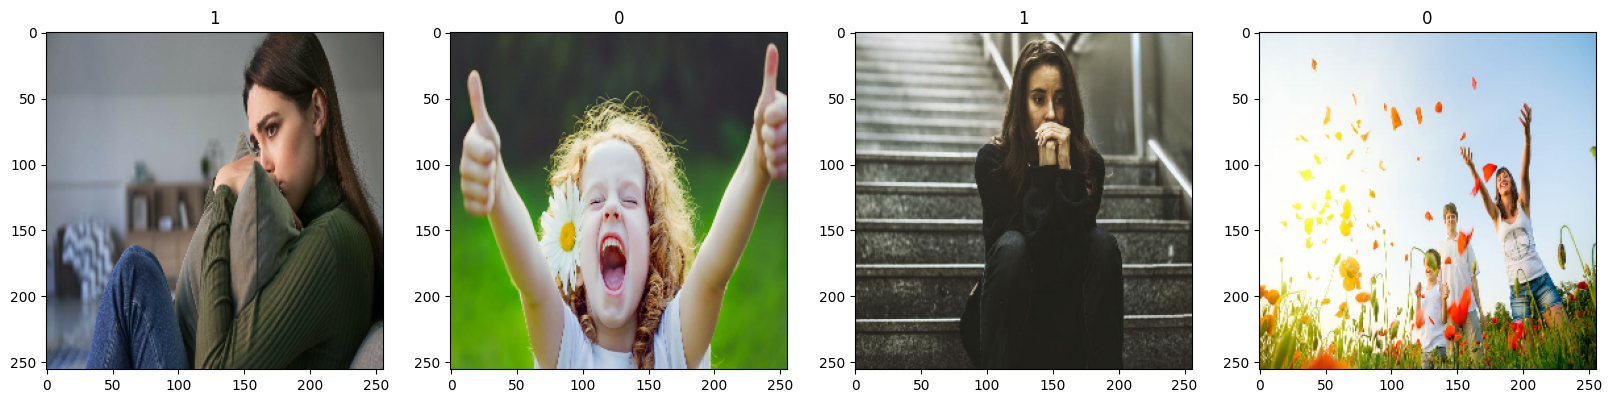

In [96]:
# plotting four images in a row and printing the binary value assigned to it
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 1 for SAD PEOPLE
# 0 for HAPPY PEOPLE

In [97]:
# data scaling
scaled_data = data.map(lambda x,y: (x/255, y))

In [98]:
scaled = scaled_data.as_numpy_iterator()
scaled_batch = scaled.next()

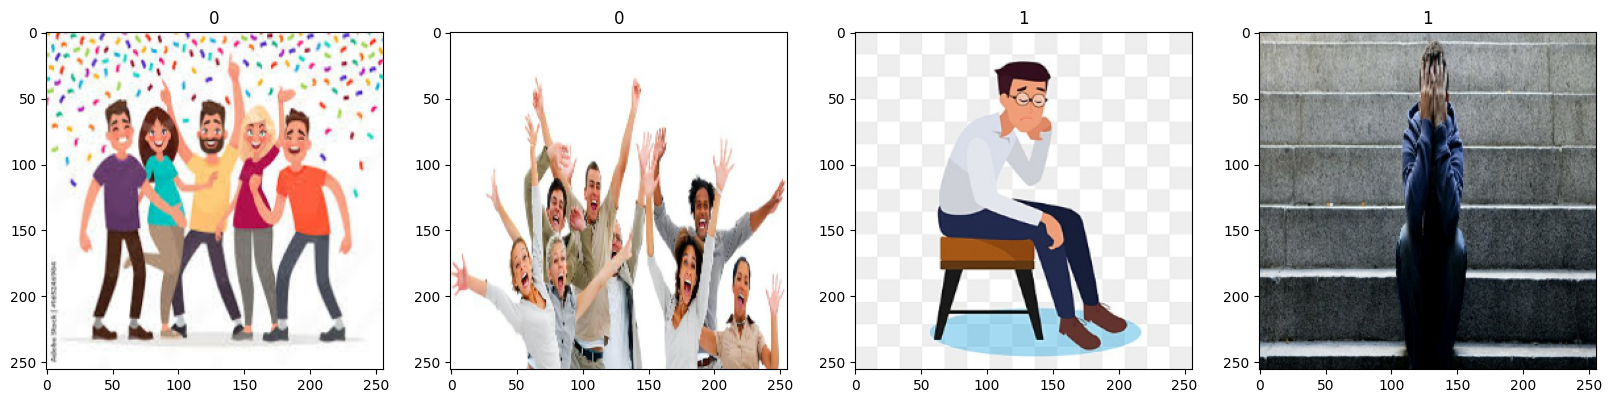

In [100]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

In [104]:
len(data)

6

In [107]:
# deciing the length of training, validation and test set of images
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [113]:
# storing the data in different variables
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [117]:
# building the prediction model
model = Sequential()

In [118]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
logdir='logs'

In [123]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [124]:
# training the model with training data and storing the history of the process of traning
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.5021 - loss: 331.5149 - val_accuracy: 0.5938 - val_loss: 21.2290
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.5833 - loss: 12.7171 - val_accuracy: 0.7812 - val_loss: 0.4974
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.6427 - loss: 1.0271 - val_accuracy: 0.9062 - val_loss: 0.6195
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.8198 - loss: 0.7023 - val_accuracy: 0.9375 - val_loss: 0.2149
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.9094 - loss: 0.7314 - val_accuracy: 1.0000 - val_loss: 0.0559
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.9479 - loss: 0.1913 - val_accuracy: 0.9688 - val_loss: 0.1845
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.9719 - loss: 0.1253 - val_accuracy: 0.9688 - val_loss: 0.0579
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.9885 - loss: 0.0298 - val_accuracy: 1.0000 - val_l

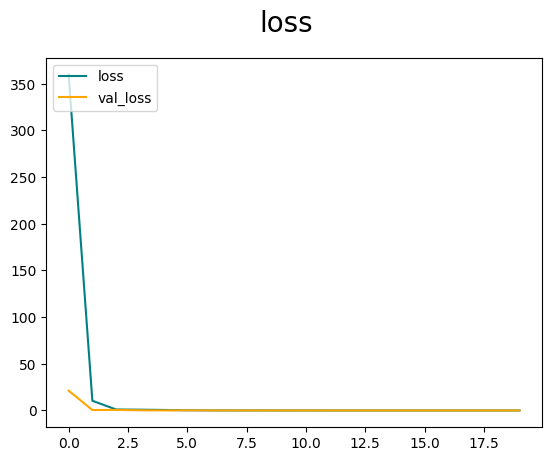

In [126]:
# plottng the loss v/s epoch number
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

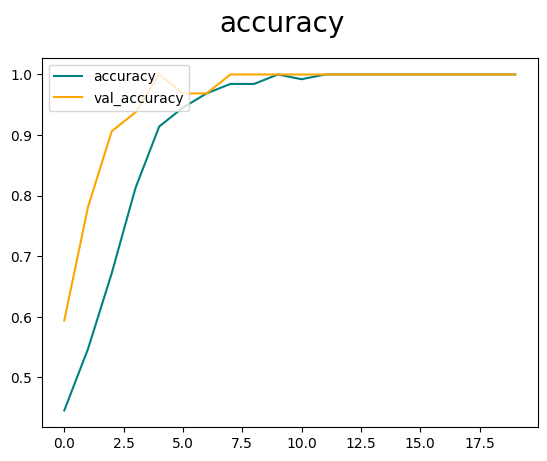

In [127]:
# plottng the accuracy v/s epoch number
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [128]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [129]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [130]:
# calculating the precision and accuracy of the training model by testing the test data
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


2024-10-08 22:25:31.907486: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [133]:
print('Precision: ', pre.result().numpy(), ',', 'Recall: ', re.result().numpy(), ',', 'Accuracy: ', acc.result().numpy())

Precision:  1.0 , Recall:  1.0 , Accuracy:  1.0


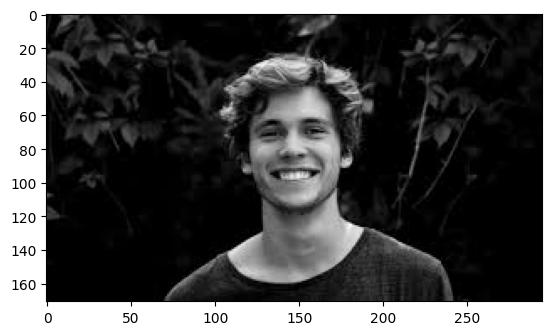

In [153]:
# Re-verification of the model using two random image of a sad and a happy face
img = cv2.imread('happy_test.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

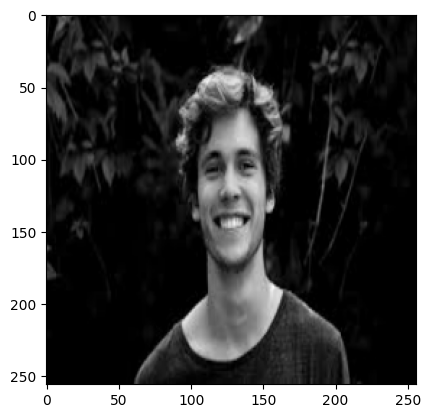

In [154]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [155]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [156]:
yhat

array([[1.2116838e-07]], dtype=float32)

In [157]:
if yhat >= 0.5:
    print("The person is sad")
else:
    print("The person is happy")

The person is happy


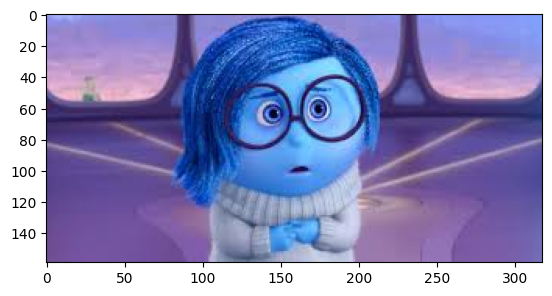

In [158]:
img = cv2.imread('sad_test.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

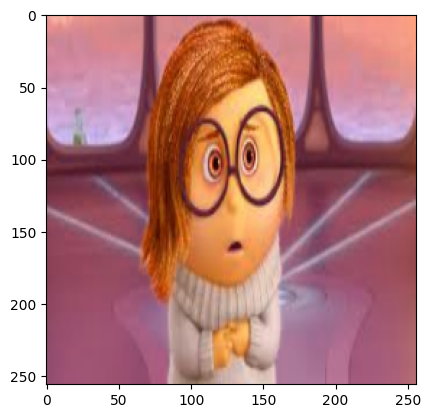

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [161]:
yhat

array([[0.99958324]], dtype=float32)

In [162]:
if yhat >= 0.5:
    print("The person is sad")
else:
    print("The person is happy")

The person is sad


In [163]:
# storing the model
from tensorflow.keras.models import load_model

In [165]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [166]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [168]:
yhat = new_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [169]:
if yhat >= 0.5:
    print("The person is sad")
else:
    print("The person is happy")

The person is sad
